In [26]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import math 

In [27]:
data = pd.read_csv('credit_card_churn.csv')
data.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


le = LabelEncoder()
data['Attrition_Flag'] = 1 - le.fit_transform(data['Attrition_Flag'])

le = LabelEncoder()
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])

le = LabelEncoder()
data['Education_Level'] = le.fit_transform(data['Education_Level'])

le = LabelEncoder()
data['Card_Category'] = le.fit_transform(data['Card_Category'])

# Encode 'Gender'
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Encode 'Income_Category'
data['Income_Category'] = label_encoder.fit_transform(data['Income_Category'])


In [29]:

X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']


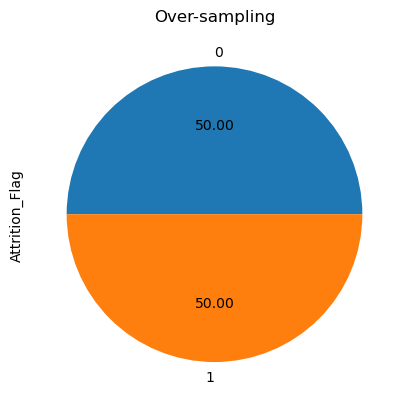

In [30]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy=1) # Numerical value
# rus = RandomoverSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [35]:
#classifiers with parameters

nb = GaussianNB()
lr = LogisticRegression(random_state=42, max_iter=1000, penalty='l2', solver='saga', C=1.0)
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
dt = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3)

In [36]:
# In[34]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [37]:

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [38]:
classifiers = {"Naive Bayes": nb,
               "Logistic Regression": lr,
               "Random Forest": rf,
               "Decision Tree": dt}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Evaluation metrics for {name}:")
    print("Confusion matrix:")
    print(cm)
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print()

Evaluation metrics for Naive Bayes:
Confusion matrix:
[[1326  350]
 [ 316 1408]]
Accuracy: 0.8041176470588235
Precision: 0.800910125142207
Recall: 0.8167053364269141
F1-score: 0.8087306145893165

Evaluation metrics for Logistic Regression:
Confusion matrix:
[[1423  253]
 [ 265 1459]]
Accuracy: 0.8476470588235294
Precision: 0.8522196261682243
Recall: 0.8462877030162413
F1-score: 0.8492433061699651

Evaluation metrics for Random Forest:
Confusion matrix:
[[1615   61]
 [  11 1713]]
Accuracy: 0.9788235294117648
Precision: 0.9656144306651635
Recall: 0.9936194895591647
F1-score: 0.9794168096054889

Evaluation metrics for Decision Tree:
Confusion matrix:
[[1590   86]
 [ 406 1318]]
Accuracy: 0.8552941176470589
Precision: 0.9387464387464387
Recall: 0.7645011600928074
F1-score: 0.8427109974424553



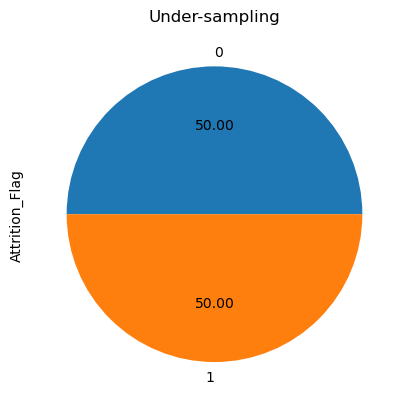

In [39]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="majority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [43]:
#classifiers with parameters

nb = GaussianNB()
lr = LogisticRegression(random_state=42, max_iter=1000, penalty='l2', solver='saga', C=1.0)
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
dt = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3)

In [44]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


# Define classifiers with parameters
nb = GaussianNB()
lr = LogisticRegression(random_state=42, max_iter=1000, penalty='l2', solver='saga', C=1.0)
rf = RandomForestClassifier(criterion ='gini', max_depth = 20, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 200)

dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3)

classifiers = {"Naive Bayes": nb,
               "Logistic Regression": lr,
               "Random Forest": rf,
               "Decision Tree": dt}

# Loop over classifiers and evaluate performance
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Use cross-validation to get performance metrics
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Evaluation metrics for {name}:")
    print("Confusion matrix:")
    print(cm)
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Cross-validation scores: {cv_scores}")
    print()


Evaluation metrics for Naive Bayes:
Confusion matrix:
[[128 221]
 [ 63 239]]
Accuracy: 0.5637480798771122
Precision: 0.5195652173913043
Recall: 0.7913907284768212
F1-score: 0.6272965879265092
Cross-validation scores: [0.59884837 0.53358925 0.58733205 0.58846154 0.55576923]



C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Romelio Villar Jr\anaconda3\lib\site-pack

Evaluation metrics for Logistic Regression:
Confusion matrix:
[[  0 349]
 [  0 302]]
Accuracy: 0.46390168970814133
Precision: 0.46390168970814133
Recall: 1.0
F1-score: 0.6337880377754459
Cross-validation scores: [0.50863724 0.50863724 0.50863724 0.50961538 0.50961538]

Evaluation metrics for Random Forest:
Confusion matrix:
[[319  30]
 [ 15 287]]
Accuracy: 0.9308755760368663
Precision: 0.9053627760252366
Recall: 0.9503311258278145
F1-score: 0.9273021001615509
Cross-validation scores: [0.92322457 0.94433781 0.95777351 0.93076923 0.95576923]

Evaluation metrics for Decision Tree:
Confusion matrix:
[[326  23]
 [ 79 223]]
Accuracy: 0.8433179723502304
Precision: 0.9065040650406504
Recall: 0.7384105960264901
F1-score: 0.8138686131386861
Cross-validation scores: [0.86564299 0.84452975 0.85028791 0.82307692 0.875     ]



In [46]:
# Print the equation of the regression model
coefficients = lr.coef_[0]
intercept = lr.intercept_[0]
equation = "y = {:.4f}".format(intercept)
for i in range(len(coefficients)):
    equation += " + ({:.4f} * x{})".format(coefficients[i], i+1)
print("Equation of the regression model:", equation)

Equation of the regression model: y = 0.0000 + (0.0000 * x1) + (0.0000 * x2) + (-0.0000 * x3) + (0.0000 * x4) + (0.0000 * x5) + (0.0000 * x6) + (0.0000 * x7) + (-0.0000 * x8) + (0.0000 * x9) + (-0.0000 * x10) + (0.0000 * x11) + (0.0000 * x12) + (-0.0000 * x13) + (-0.0000 * x14) + (0.0000 * x15) + (-0.0000 * x16) + (-0.0000 * x17) + (-0.0000 * x18) + (-0.0000 * x19) + (-0.0000 * x20)
